In [32]:
import pandas as pd
from utils.blast_utils import makeblast_db, blastn, default_blast_columns
import os

input_nam_blocks = '/home/jpereira/OEs/Blocks_Namasivayam_without_p.fa'
input_auto_blocks_nam = '/home/jpereira/OEs/Results/OE1/NamSeqs/Data/Blocks/block_iterations/1/centroids.fasta' 
output_blastn_blocks_tsv = '/home/jpereira/OEs/Results/OE1/NamSeqs/Data/Blocks_test/blastn.Nam_vs_AutoNam.tsv' 

db_dir = os.path.join(os.path.dirname(output_blastn_blocks_tsv), 'blast_db', 'nam_auto_blocks_db') #'/home/jpereira/OEs/OE1.v2/Data/blocks/blast_db/infasta_db' 
os.makedirs(db_dir, exist_ok=True)

## Make a reciprocal blast using blastn function from blast utils
infasta_db = makeblast_db(seqs_path=input_auto_blocks_nam, db_out=db_dir, remove_old_db=True)
blastn(blast_input_seqs=input_nam_blocks, blast_db_file=infasta_db, blast_output_table_tsv=output_blastn_blocks_tsv,
             num_threads=100, word_size=20)



Building a new DB, current time: 05/13/2025 12:29:35
New DB name:   /home/jpereira/OEs/Results/OE1/NamSeqs/Data/Blocks_test/blast_db/nam_auto_blocks_db/centroids.fasta
New DB title:  /home/jpereira/OEs/Results/OE1/NamSeqs/Data/Blocks/block_iterations/1/centroids.fasta
Sequence type: Nucleotide
Keep MBits: T
Maximum file size: 3000000000B
Adding sequences from FASTA; added 845 sequences in 0.00649095 seconds.


makeblastdb ran successfully.
Running: blastn -query /home/jpereira/OEs/Blocks_Namasivayam_without_p.fa -db /home/jpereira/OEs/Results/OE1/NamSeqs/Data/Blocks_test/blast_db/nam_auto_blocks_db/centroids.fasta -out /home/jpereira/OEs/Results/OE1/NamSeqs/Data/Blocks_test/blastn.Nam_vs_AutoNam.tsv -num_threads 100 -reward 1 -gapextend 2 -gapopen 5 -penalty -2 -word_size 20 -outfmt '6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore qlen slen'
blastn ran successfully.


In [33]:
blast_df = pd.read_csv(output_blastn_blocks_tsv, sep='\t')
blast_df.columns = default_blast_columns

blast_df.sample(10)

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,qlen,slen
647,Tg_mtDNA_O,Seq154;size=6,100.000,49,0,0,21,69,49,1,2.200000e-22,94.9,86,49
786,Tg_mtDNA_T,Seq1202;size=1,93.487,261,1,1,1,261,245,1,4.050000e-112,394.0,279,245
269,Tg_mtDNA_F,Seq57;size=17,100.000,57,0,0,109,165,1,57,1.150000e-26,110.0,179,57
348,Tg_mtDNA_I,Seq413;size=1,98.649,74,1,0,131,204,74,1,1.050000e-34,137.0,204,264
438,Tg_mtDNA_K,Seq862;size=1,93.393,333,0,1,113,445,1,311,6.660000e-145,504.0,445,328
315,Tg_mtDNA_H,Seq1216;size=1,98.374,123,2,0,1,123,123,1,5.620000e-61,225.0,447,124
502,Tg_mtDNA_L,Seq1608;size=1,98.684,76,1,0,57,132,76,1,5.560000e-36,141.0,159,86
572,Tg_mtDNA_M,Seq618;size=1,96.032,126,3,2,104,229,144,21,1.750000e-51,194.0,754,144
169,Tg_mtDNA_D,Seq38;size=21,100.000,66,0,0,17,82,1,66,3.000000e-32,127.0,82,72
871,Tg_mtDNA_V,Seq391;size=1,100.000,50,0,0,104,153,1,50,1.160000e-22,96.8,161,50


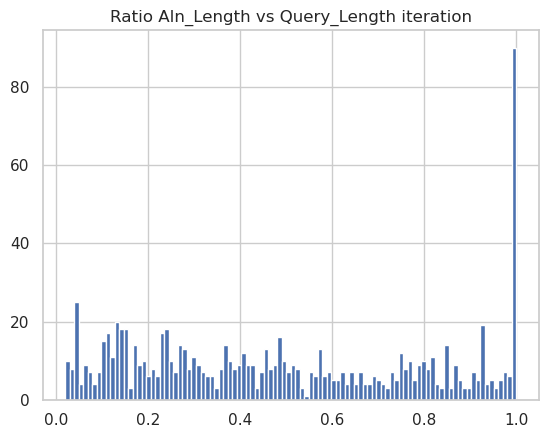

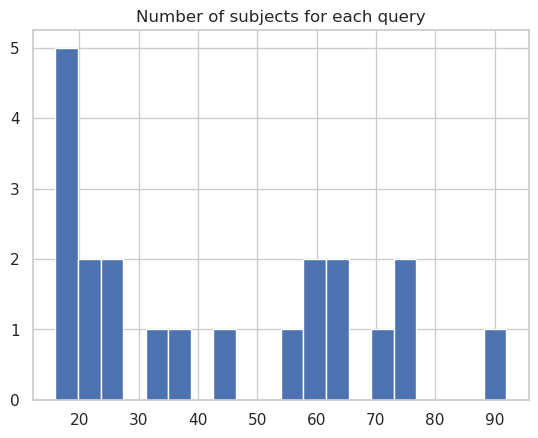

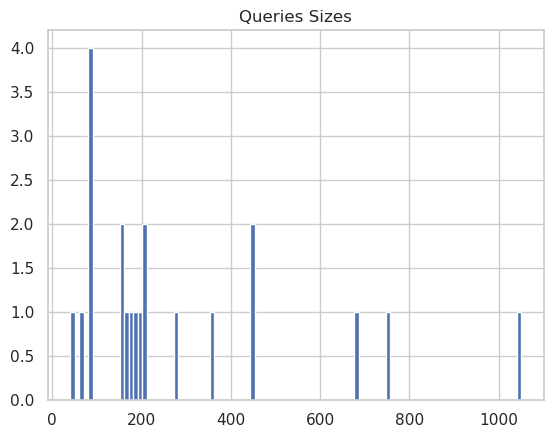

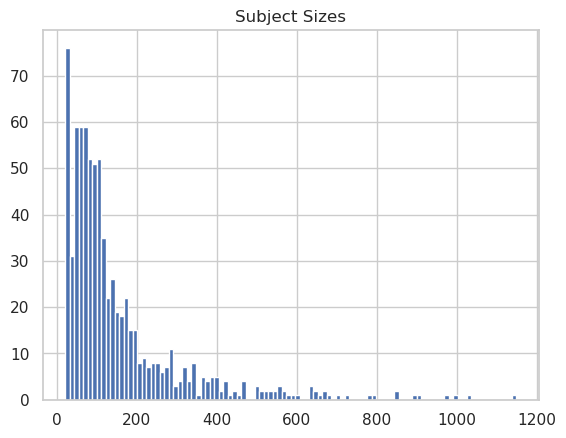

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

#Block alignment size vs block size
(blast_df['length']/blast_df['qlen']).hist( bins=100)
plt.title(f"Ratio Aln_Length vs Query_Length iteration")
plt.show()

# Number of aligments for each block
blast_df.groupby('qseqid')['sseqid'].count().hist(bins=20)
plt.title(f"Number of subjects for each query")
plt.show()


blast_df.groupby('qseqid')['qlen'].first().hist(bins=100)
plt.title(f"Queries Sizes")
plt.show()

blast_df.groupby('sseqid')['slen'].first().hist(bins=100)
plt.title(f"Subject Sizes")
plt.show()

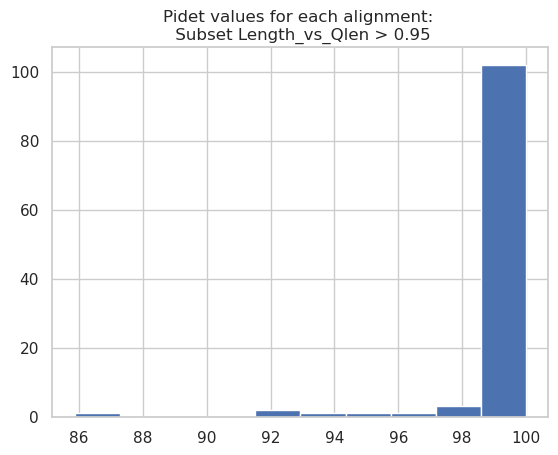

/tmp/ipykernel_1801122/47228794.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df['slen_vs_qlen'] = mini_df['slen']/mini_df['qlen']


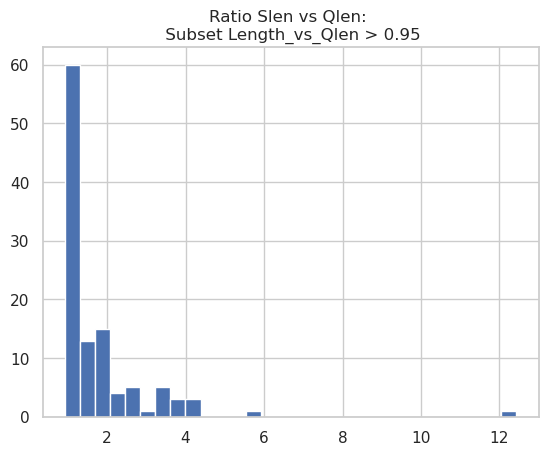

In [35]:
blast_df['length_vs_qlen'] = blast_df['length']/blast_df['qlen']
mini_df = blast_df[blast_df['length_vs_qlen'] > 0.95]

mini_df['pident'].hist()
plt.title('Pidet values for each alignment: \n Subset Length_vs_Qlen > 0.95')
plt.show()

mini_df['slen_vs_qlen'] = mini_df['slen']/mini_df['qlen']
mini_df['slen_vs_qlen'].hist(bins=30)
plt.title('Ratio Slen vs Qlen: \n Subset Length_vs_Qlen > 0.95')
plt.show()


In [36]:
# Queries with subjects of similar size
similar_sizes = (mini_df['slen_vs_qlen'] < 1.10) & (mini_df['slen_vs_qlen'] > 0.90)
print(mini_df[similar_sizes]['qseqid'].unique())

# Queries with subjects of similar or smaller size 
smaller_sizes = mini_df['slen_vs_qlen'] < 1.05
print(mini_df[smaller_sizes]['qseqid'].unique())

['Tg_mtDNA_A' 'Tg_mtDNA_C' 'Tg_mtDNA_D' 'Tg_mtDNA_E' 'Tg_mtDNA_I'
 'Tg_mtDNA_J' 'Tg_mtDNA_N' 'Tg_mtDNA_O' 'Tg_mtDNA_P' 'Tg_mtDNA_R'
 'Tg_mtDNA_S' 'Tg_mtDNA_T' 'Tg_mtDNA_U' 'Tg_mtDNA_V']
['Tg_mtDNA_A' 'Tg_mtDNA_C' 'Tg_mtDNA_D' 'Tg_mtDNA_E' 'Tg_mtDNA_I'
 'Tg_mtDNA_J' 'Tg_mtDNA_N' 'Tg_mtDNA_O' 'Tg_mtDNA_P' 'Tg_mtDNA_R'
 'Tg_mtDNA_S' 'Tg_mtDNA_T' 'Tg_mtDNA_U' 'Tg_mtDNA_V']
